<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading

**Chapter 04 &mdash; Vectorized Backtesting**

## Making Use of Vectorization

### Vectorization with NumPy 

In [ ]:
v = [1, 2, 3, 4, 5]

In [ ]:
# In pure python we need loops (here an indirect one) for dealing with arrays
sm = [2 * i for i in v]

In [ ]:
sm

[2, 4, 6, 8, 10]

In [ ]:
# Also certain operation (scalar multiplication) are not working as expected 
# Note: This command does NOT scalyr multiplication, it just duplicates the array
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [2]:
# But numpy helps a lot here...
import numpy as np

In [ ]:
# numpy arrays can be created from python arrays...
a = np.array(v)

In [ ]:
# printing them shows "array" in front of the actual value... 
a

array([1, 2, 3, 4, 5])

In [ ]:
# and they are of type numpy.ndarray
type(a)

numpy.ndarray

In [ ]:
# This now does what we want (scalar multiplication)
2 * a

array([ 2,  4,  6,  8, 10])

In [ ]:
# Linear arithmetic operations are fast and concise
0.5 * a + 2

array([2.5, 3. , 3.5, 4. , 4.5])

In [ ]:
# test data: creates array 0,...,11 and reshapes it to 4x3 matrix
a = np.arange(12).reshape((4, 3))

In [ ]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
2 * a

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [ ]:
# This is square (^2)
a ** 2

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]])

In [ ]:
# calculate mean of all elements by a method call
a.mean()

5.5

In [ ]:
# calculate mean of all elements by a universal function (equivalent)
np.mean(a)

5.5

In [ ]:
# calculates mean along axis 0 (over every row)
a.mean(axis=0)

array([4.5, 5.5, 6.5])

In [ ]:
# calculates mean along axis 1 (over every col)
np.mean(a, axis=1)

array([ 1.,  4.,  7., 10.])

### Vectorization with pandas

In [ ]:
# pandas makes heavy use of numpy and its ndarrays
a = np.arange(15).reshape(5, 3)

In [ ]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [ ]:
import pandas as pd

In [ ]:
columns = list('abc')

In [ ]:
columns

['a', 'b', 'c']

In [ ]:
index = pd.date_range('2021-7-1', periods=5, freq='B') # Note: freq='B' means 'Business Days'

In [ ]:
index

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
df = pd.DataFrame(a, columns=columns, index=index)

In [ ]:
df

,a,b,c
2021-07-01,0,1,2
2021-07-02,3,4,5
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [ ]:
2 * df

,a,b,c
2021-07-01,0,2,4
2021-07-02,6,8,10
2021-07-05,12,14,16
2021-07-06,18,20,22
2021-07-07,24,26,28


In [ ]:
# Note that the default for aggregation operations is column-wise (over columns, like axis=1)
df.sum()

a    30
b    35
c    40
dtype: int64

In [ ]:
# NumPy also accepts pandas DataFrames
np.sum(df)

a    30
b    35
c    40
dtype: int64

In [ ]:
# Just a demo what rolling(X).func() can do on pandas DataFrame objects...
df['rolling_avg_2'] = df['a'].rolling(2).mean()
df['rolling_sum_2'] = df['a'].rolling(2).sum()
df

,a,b,c,rolling_avg_2,rolling_sum_2
2021-07-01,0,1,2,NaN,NaN
2021-07-02,3,4,5,1.5,3.0
2021-07-05,6,7,8,4.5,9.0
2021-07-06,9,10,11,7.5,15.0
2021-07-07,12,13,14,10.5,21.0


In [ ]:
# Column-wise operations can be schieved by referncing them by name...
df['a'] + df['c']

2021-07-01     2
2021-07-02     8
2021-07-05    14
2021-07-06    20
2021-07-07    26
Freq: B, dtype: int64

In [ ]:
# ...or by the dot syntax
0.5 * df.a + 2 * df.b - df.c

2021-07-01     0.0
2021-07-02     4.5
2021-07-05     9.0
2021-07-06    13.5
2021-07-07    18.0
Freq: B, dtype: float64

In [ ]:
# Which elements in a are greater than 5?
df['a'] > 5

2021-07-01    False
2021-07-02    False
2021-07-05     True
2021-07-06     True
2021-07-07     True
Freq: B, Name: a, dtype: bool

In [ ]:
# Filter for only the elements in a that are greater than 5?
df[df['a'] > 5]

,a,b,c
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [ ]:
df['c'] > df['b']

2021-07-01    True
2021-07-02    True
2021-07-05    True
2021-07-06    True
2021-07-07    True
Freq: B, dtype: bool

In [ ]:
0.15 * df.a + df.b > df.c

2021-07-01    False
2021-07-02    False
2021-07-05    False
2021-07-06     True
2021-07-07     True
Freq: B, dtype: bool

## Strategies based on Simple Moving Averages

### Getting into the Basics 

In [ ]:
raw = pd.read_csv('./pyalgo_eikon_eod_data.csv',
                   index_col=0, parse_dates=True).dropna()

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [ ]:
data = pd.DataFrame(raw['EUR='])

In [ ]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [ ]:
# Pick one column of interest, create a new data frame from it and rename it to 'price' 
# This trick is done very often
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [ ]:
data['SMA1'] = data['price'].rolling(42).mean()

In [ ]:
data['SMA2'] = data['price'].rolling(252).mean()

In [ ]:
# Here we can see that using rolling(X) makes the first X rows of the respective average NaN 
data.head(45)

,price,SMA1,SMA2
Date,,,
2010-01-04,1.4411,NaN,NaN
2010-01-05,1.4368,NaN,NaN
2010-01-06,1.4412,NaN,NaN
2010-01-07,1.4318,NaN,NaN
2010-01-08,1.4412,NaN,NaN
2010-01-11,1.4513,NaN,NaN
2010-01-12,1.4494,NaN,NaN
2010-01-13,1.4510,NaN,NaN
2010-01-14,1.4502,NaN,NaN


In [ ]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [ ]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

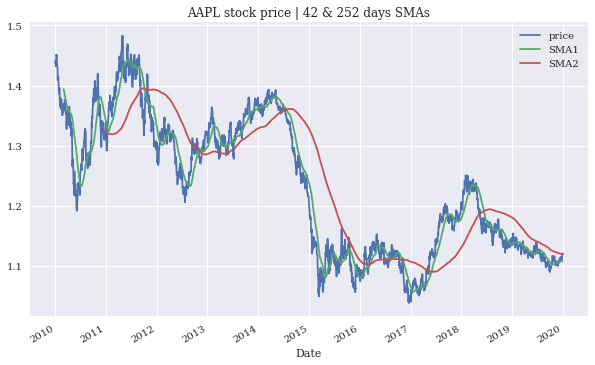

In [ ]:
data.plot(title='AAPL stock price | 42 & 252 days SMAs',
          figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_1.png')

In [ ]:
data['position'] = np.where(data['SMA1'] > data['SMA2'],
                            1, -1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
# All the early samples were dropped were SMAs are still NaN because now we need all rows valid
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2010-12-31 to 2019-12-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2265 non-null   float64
 1   SMA1      2265 non-null   float64
 2   SMA2      2265 non-null   float64
 3   position  2265 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 88.5 KB


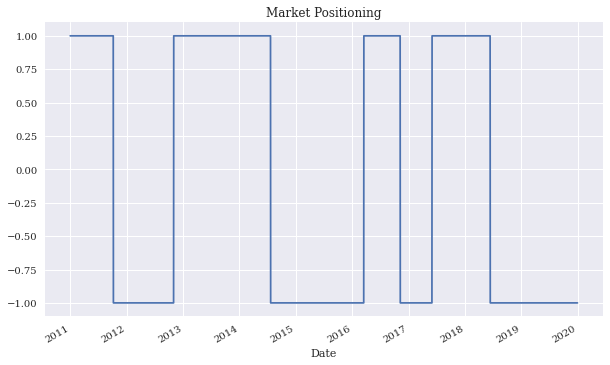

In [ ]:
data['position'].plot(ylim=[-1.1, 1.1],
                      title='Market Positioning',
                      figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_2.png')

In [ ]:
# Explanation follows...
data['returns'] = np.log(data['price'] / data['price'].shift(1))
data

,price,SMA1,SMA2,position,returns,strategy,cumret,cummax
Date,,,,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN,NaN,NaN,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946,-0.001946,0.998056,0.998056
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752,-0.003752,0.994319,0.998056
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341,-0.011341,0.983105,0.998056
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472,-0.011472,0.971892,0.998056
...,...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1,0.000090,-0.000090,1.302328,1.379350
2019-12-26,1.1096,1.107740,1.119529,-1,0.000811,-0.000811,1.301272,1.379350
2019-12-27,1.1175,1.107924,1.119428,-1,0.007094,-0.007094,1.292073,1.379350


In [ ]:
# Explanation start 
# Expl. #1: So if those are the prices...
data['price'] 

Date
2010-12-31    1.3377
2011-01-03    1.3351
2011-01-04    1.3301
2011-01-05    1.3151
2011-01-06    1.3001
               ...  
2019-12-24    1.1087
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
Name: price, Length: 2265, dtype: float64

In [ ]:
# Expl. #2: ...then shift(1) shifts them by 1 TO THE FUTURE. Thus, the shift(1) version are the closing prices
data['price'].shift(1)

Date
2010-12-31       NaN
2011-01-03    1.3377
2011-01-04    1.3351
2011-01-05    1.3301
2011-01-06    1.3151
               ...  
2019-12-24    1.1086
2019-12-26    1.1087
2019-12-27    1.1096
2019-12-30    1.1175
2019-12-31    1.1197
Name: price, Length: 2265, dtype: float64

In [ ]:
# Expl. #3: The ratio "price/closing_price" gives the returns in percent
#           Using ratio is preferable to using differences, because it is independent of the invested capital
data['price'] / data['price'].shift(1)

Date
2010-12-31         NaN
2011-01-03    0.998056
2011-01-04    0.996255
2011-01-05    0.988723
2011-01-06    0.988594
                ...   
2019-12-24    1.000090
2019-12-26    1.000812
2019-12-27    1.007120
2019-12-30    1.001969
2019-12-31    1.001161
Name: price, Length: 2265, dtype: float64

In [ ]:
# Expl. #4: Using the logs of returns has some beneficial properties in comparison to the "normal" returns.
#           log and exp inverse each other, independent of ordering and whether is used as function or with apply()
#           val == np.log(np.exp(val)) == np.log(val).apply(np.exp) == (val.apply(np.exp)).apply(np.log)
# Explanation end 
np.log(data['price'] / data['price'].shift(1))

Date
2010-12-31         NaN
2011-01-03   -0.001946
2011-01-04   -0.003752
2011-01-05   -0.011341
2011-01-06   -0.011472
                ...   
2019-12-24    0.000090
2019-12-26    0.000811
2019-12-27    0.007094
2019-12-30    0.001967
2019-12-31    0.001160
Name: price, Length: 2265, dtype: float64

In [ ]:
#val = pd.DataFrame(np.array([3]), columns=1, index=None)
#val == np.log(np.exp(val)) == np.log(val).apply(np.exp) == val.apply(np.exp).apply(np.log)

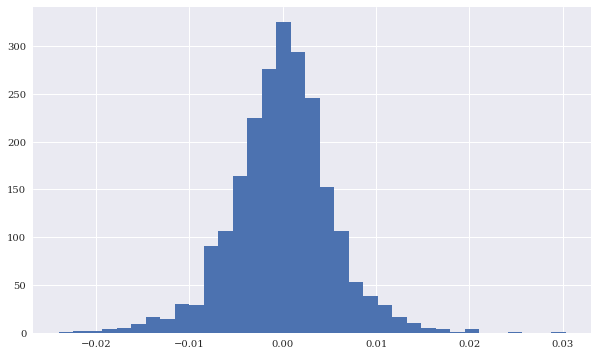

In [ ]:
data['returns'].hist(bins=35, figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_3.png')

In [ ]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [ ]:
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [ ]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

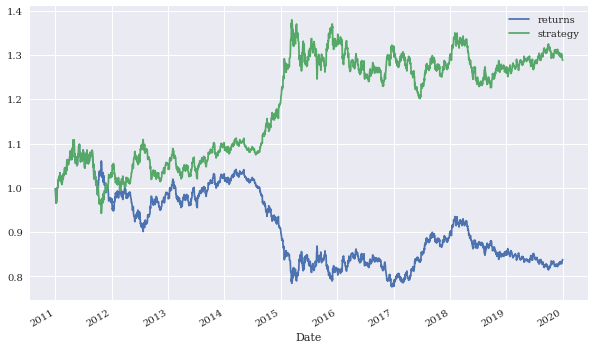

In [ ]:
data[['returns', 'strategy']].dropna().cumsum(
            ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_4.png')

In [ ]:
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [ ]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [ ]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [ ]:
data['cummax'] = data['cumret'].cummax()

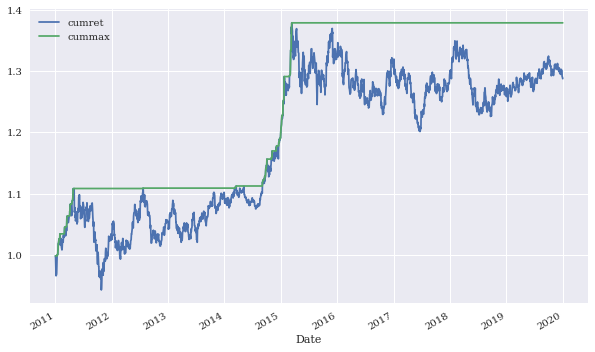

In [ ]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_5.png')

In [ ]:
drawdown = data['cummax'] - data['cumret']

In [ ]:
drawdown.max()

0.17779367070195917

In [ ]:
temp = drawdown[drawdown == 0]

In [ ]:
periods = (temp.index[1:].to_pydatetime() -
           temp.index[:-1].to_pydatetime())

In [ ]:
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10)], dtype=object)

In [ ]:
periods.max()

datetime.timedelta(days=596)

### Generalizing the Approach

In [ ]:
import SMAVectorBacktester as SMA

In [ ]:
smabt = SMA.SMAVectorBacktester('EUR=', 42, 252,
                                '2010-1-1', '2019-12-31') 

In [ ]:
smabt.run_strategy()

(1.24, 0.36)

In [ ]:
%%time
smabt.optimize_parameters((30, 50, 2),
                          (200, 300, 2))

CPU times: user 3.92 s, sys: 14.8 ms, total: 3.94 s
Wall time: 3.94 s


(array([ 48., 238.]), 1.44)

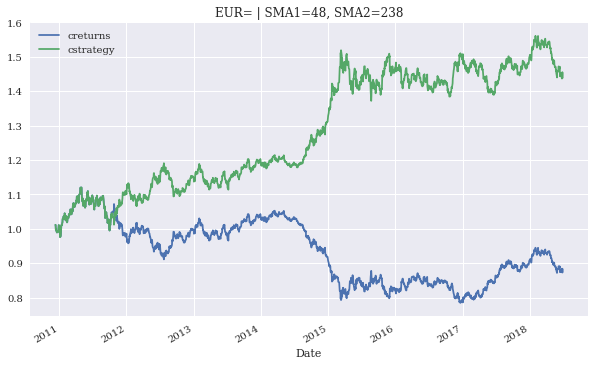

In [ ]:
smabt.plot_results()
# plt.savefig('../../images/ch04/sma_plot_6.png')

## Strategies based on Momentum

### Getting into the Basics

In [ ]:
data = pd.DataFrame(raw['XAU='])

In [ ]:
data.rename(columns={'XAU=': 'price'}, inplace=True)

In [ ]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [ ]:
data['position'] = np.sign(data['returns'])

In [ ]:
data['strategy'] = data['position'].shift(1) * data['returns']

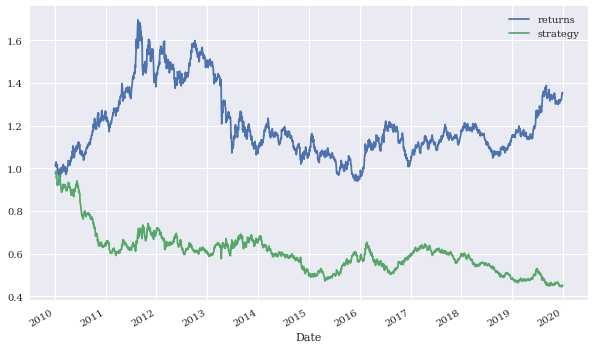

In [ ]:
data[['returns', 'strategy']].dropna().cumsum(
            ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/mom_plot_1.png')

In [ ]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [ ]:
data['strategy'] = data['position'].shift(1) * data['returns']

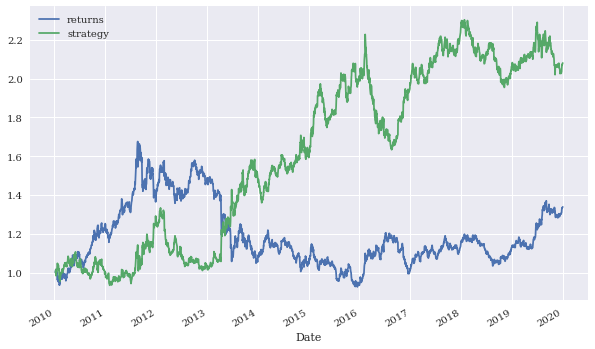

In [ ]:
data[['returns', 'strategy']].dropna().cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/mom_plot_2.png')

#### Intraday Data from Eikon

In [ ]:
fn = '../data/AAPL_1min_05052020.csv'
# fn = '../data/SPX_1min_05052020.csv'

In [ ]:
data = pd.read_csv(fn, index_col=0, parse_dates=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-05-05 16:00:00 to 2020-05-05 20:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    241 non-null    float64
 1   LOW     241 non-null    float64
 2   OPEN    241 non-null    float64
 3   CLOSE   241 non-null    float64
 4   COUNT   241 non-null    float64
 5   VOLUME  241 non-null    float64
dtypes: float64(6)
memory usage: 13.2 KB


In [ ]:
data['returns'] = np.log(data['CLOSE'] /
                         data['CLOSE'].shift(1))

In [ ]:
to_plot = ['returns']

In [ ]:
for m in [1, 3, 5, 7, 9]:
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' % m] = (data['position_%d' % m].shift(1) *
                               data['returns'])
    to_plot.append('strategy_%d' % m) 

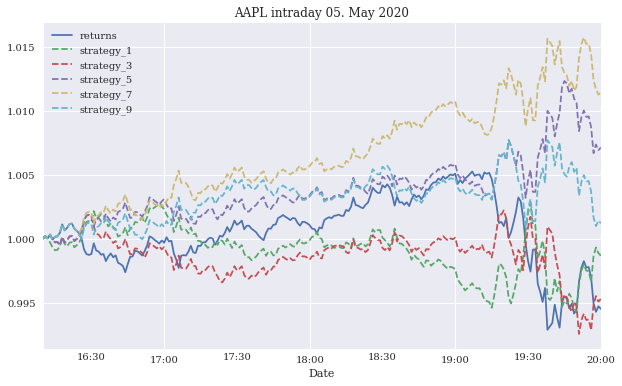

In [ ]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='AAPL intraday 05. May 2020',
    figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);
# plt.savefig('../../images/ch04/mom_plot_4.png')
# plt.savefig('../../images/ch04/mom_plot_5.png')

### Generalizing the Approach

In [ ]:
import MomVectorBacktester as Mom

In [ ]:
mombt = Mom.MomVectorBacktester('XAU=', '2010-1-1',
                                '2019-12-31', 10000, 0.0)

In [ ]:
mombt.run_strategy(momentum=3)

(21202.37, 10139.12)

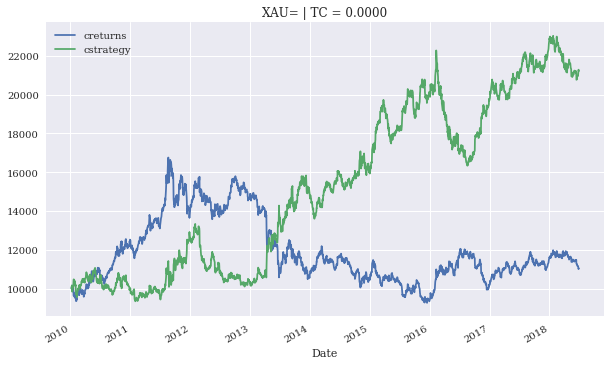

In [ ]:
mombt.plot_results()
# plt.savefig('../../images/ch04/mom_plot_6.png')

In [ ]:
mombt = Mom.MomVectorBacktester('XAU=', '2010-1-1',
                                '2019-12-31', 10000, 0.001)

In [ ]:
mombt.run_strategy(momentum=3)

(12196.06, 1132.8)

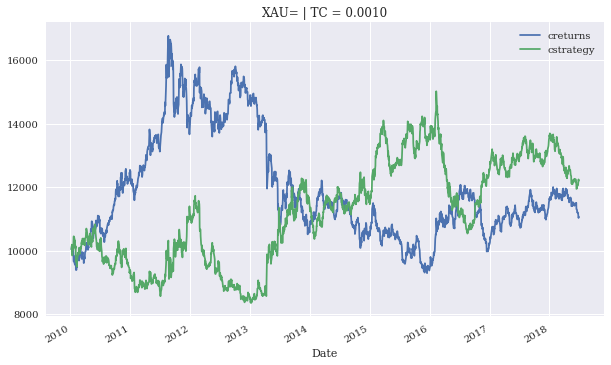

In [ ]:
mombt.plot_results()
# plt.savefig('../../images/ch04/mom_plot_7.png')

## Strategies based on Mean-Reversion

### Getting into the Basics

In [ ]:
data = pd.DataFrame(raw['GDX'])

In [ ]:
data.rename(columns={'GDX': 'price'}, inplace=True)

In [ ]:
data['returns'] = np.log(data['price'] /
                         data['price'].shift(1))

In [ ]:
SMA = 25

In [ ]:
data['SMA'] = data['price'].rolling(SMA).mean()

In [ ]:
threshold = 3.5

In [ ]:
data['distance'] = data['price'] - data['SMA']

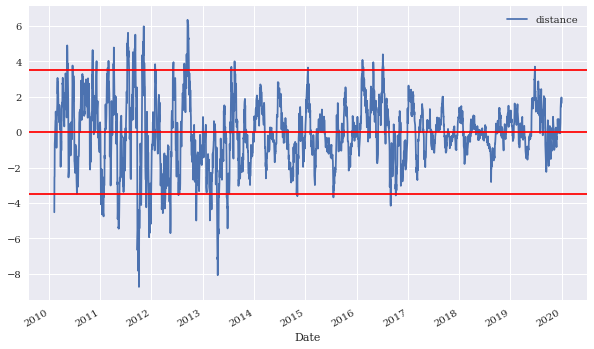

In [ ]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');
# plt.savefig('../../images/ch04/mr_plot_1.png')

In [ ]:
data['position'] = np.where(data['distance'] > threshold,
                            -1, np.nan)

In [ ]:
data['position'] = np.where(data['distance'] < -threshold,
                            1, data['position'])

In [ ]:
data['position'] = np.where(data['distance'] *
            data['distance'].shift(1) < 0, 0, data['position'])

In [ ]:
data['position'] = data['position'].ffill().fillna(0)

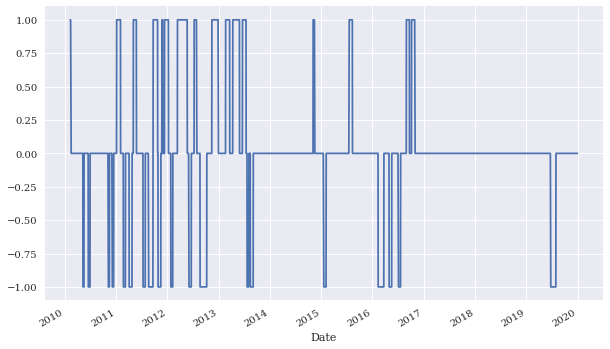

In [ ]:
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],
                               figsize=(10, 6));
# plt.savefig('../../images/ch04/mr_plot_2.png')

In [ ]:
data['strategy'] = data['position'].shift(1) * data['returns']

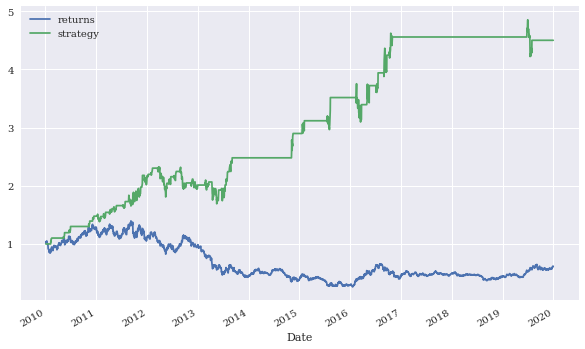

In [ ]:
data[['returns', 'strategy']].dropna().cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/mr_plot_3.png')

### Generalizing the Approach 

In [ ]:
import MRVectorBacktester as MR

In [ ]:
mrbt = MR.MRVectorBacktester('GLD', '2010-1-1', '2019-12-31',
                             10000, 0.001)

In [ ]:
mrbt.run_strategy(SMA=43, threshold=7.5)

(14599.04, 3891.53)

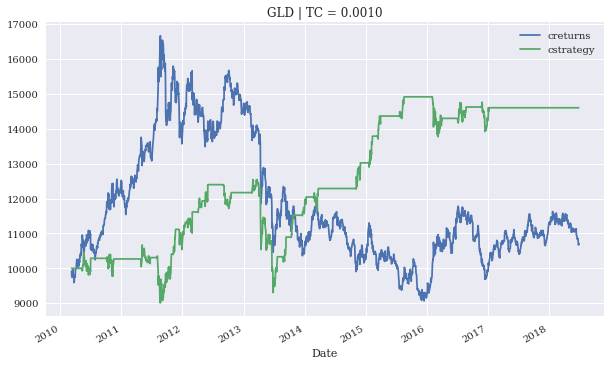

In [ ]:
mrbt.plot_results()
# plt.savefig('../../images/ch04/mr_plot_4.png')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>